In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')
%matplotlib inline

In [83]:
df = pd.read_csv("Consumo_cerveja.csv").drop("Data",axis = 1)
df = df.dropna()
df.head()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,"27,3","23,9","32,5",0,0.0,25.461
1,"27,02","24,5","33,5",0,0.0,28.972
2,"24,82","22,4","29,9",0,1.0,30.814
3,"23,98","21,5","28,6","1,2",1.0,29.799
4,"23,82",21,"28,3",0,0.0,28.900


<AxesSubplot:>

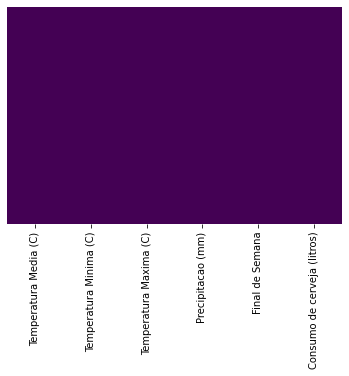

In [84]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [85]:
df['Temperatura Maxima (C)'] = df['Temperatura Maxima (C)'].str.replace(",",".")
df['Temperatura Media (C)'] = df['Temperatura Media (C)'].str.replace(",",".")
df['Temperatura Minima (C)'] = df['Temperatura Minima (C)'].str.replace(",",".")
df['Precipitacao (mm)'] = df['Precipitacao (mm)'].str.replace(",",".")

In [86]:
df.dtypes

Temperatura Media (C)           object
Temperatura Minima (C)          object
Temperatura Maxima (C)          object
Precipitacao (mm)               object
Final de Semana                float64
Consumo de cerveja (litros)    float64
dtype: object

In [87]:
df[['Temperatura Maxima (C)','Temperatura Media (C)','Temperatura Minima (C)','Precipitacao (mm)']] = df[['Temperatura Maxima (C)','Temperatura Media (C)','Temperatura Minima (C)','Precipitacao (mm)']].apply(pd.to_numeric)

In [88]:
df.dtypes

Temperatura Media (C)          float64
Temperatura Minima (C)         float64
Temperatura Maxima (C)         float64
Precipitacao (mm)              float64
Final de Semana                float64
Consumo de cerveja (litros)    float64
dtype: object

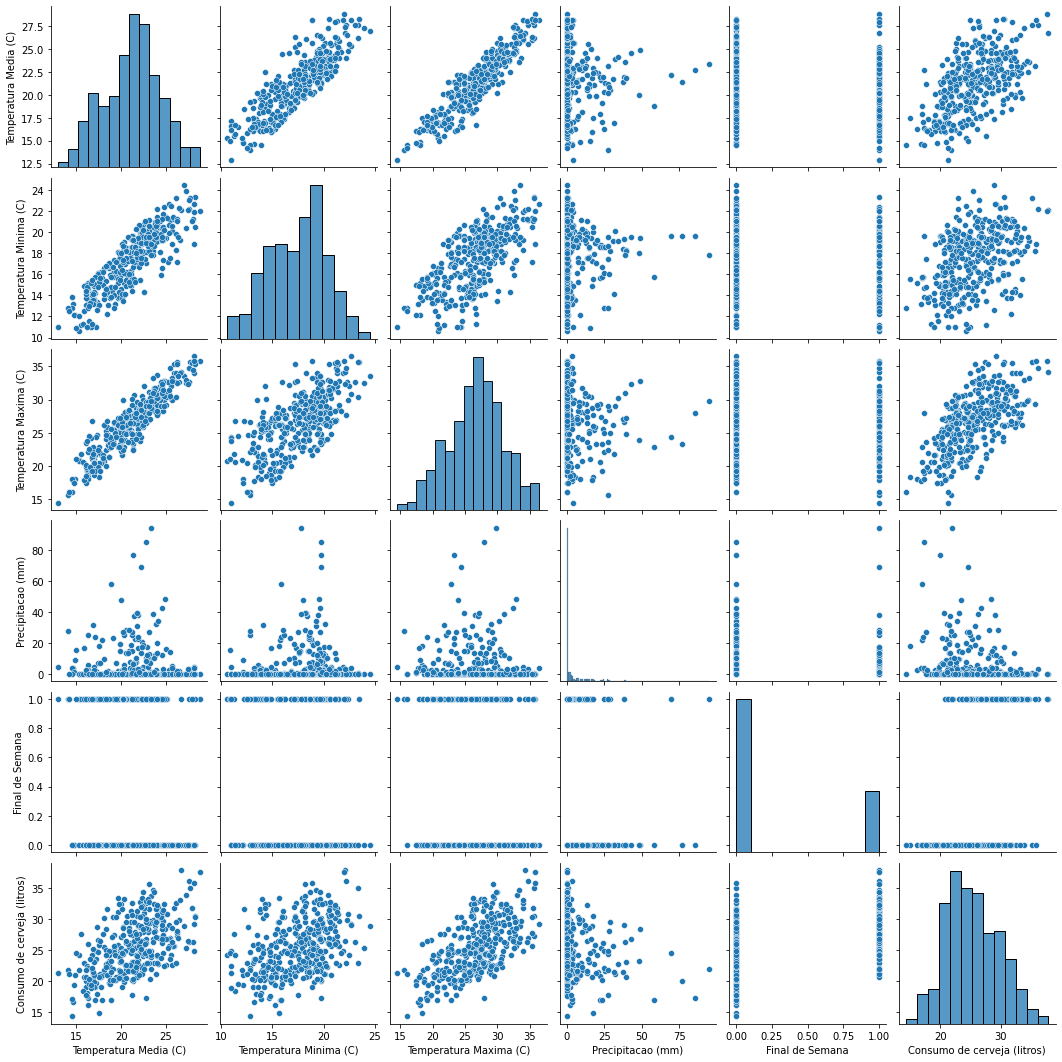

In [89]:
sns.pairplot(df)

<AxesSubplot:>

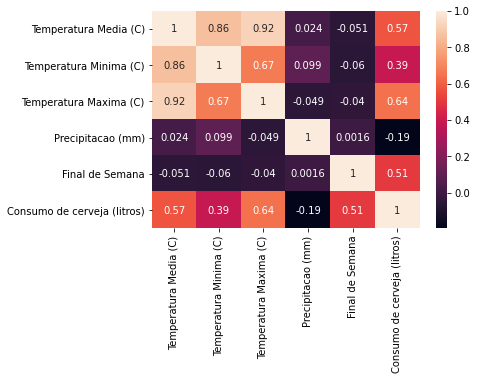

In [90]:
sns.heatmap(df.corr(),annot=True)

In [91]:
df.columns

Index(['Temperatura Media (C)', 'Temperatura Minima (C)',
       'Temperatura Maxima (C)', 'Precipitacao (mm)', 'Final de Semana',
       'Consumo de cerveja (litros)'],
      dtype='object')

In [92]:
X = df[['Temperatura Media (C)', 'Temperatura Minima (C)',
       'Temperatura Maxima (C)', 'Precipitacao (mm)', 'Final de Semana']]

In [93]:
y = df["Consumo de cerveja (litros)"]

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [95]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [97]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
prediction = lm.predict(X_test)

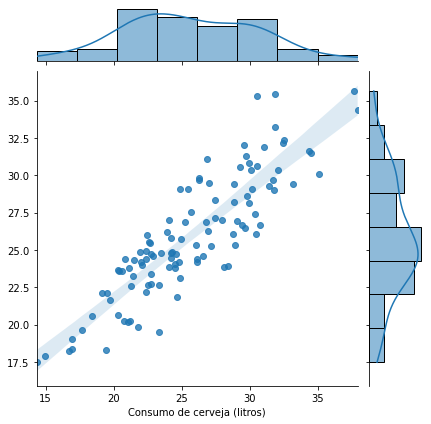

In [98]:
sns.jointplot(y_test,prediction,kind = "reg")

<AxesSubplot:xlabel='Consumo de cerveja (litros)', ylabel='Density'>

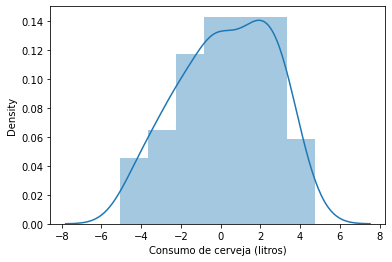

In [99]:
sns.distplot((prediction-y_test))

In [100]:
explained_variance_score(y_test,prediction)

0.7614996231782217

<AxesSubplot:xlabel='Consumo de cerveja (litros)'>

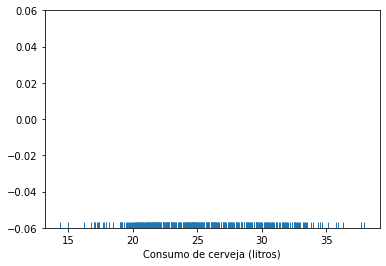

In [101]:
sns.rugplot(df["Consumo de cerveja (litros)"])